# Generate lookup tables

In [1]:
import soapcw as soap
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

There are three peices of code which generate the line aware statistic
1. Uses python trapz integration (almost as fast as C++ but not as accurate (generally good enough), this is the default) 
2. Uses python quad integration (slowest)
3. Uses C++ integration (fastest but requires other libraries to be installed) (this also requires the package to be build from source and an edit of the current setup file)

We can generate the line aware statistic in for one detector with 

In [7]:
powers = np.linspace(1,400,10)
v1d = soap.line_aware_stat.gen_lookup_python.LineAwareStatistic(powers,ndet=1,pvs=1.5,pvl=1.5,ratio=0.3)

Text(0, 0.5, 'line aware statistic')

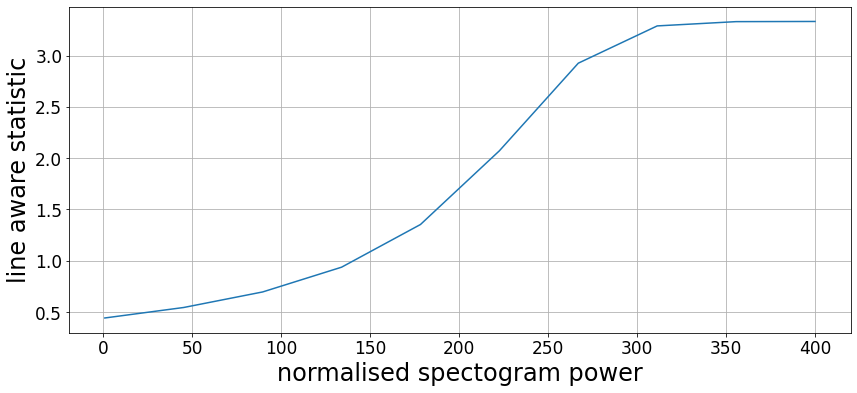

In [11]:
fig, ax = plt.subplots(figsize = (14,6))
ax.plot(powers, v1d.signoiseline)
ax.set_xlabel("normalised spectogram power")
ax.set_ylabel("line aware statistic")

where is can be saved to a file by

In [14]:
v1d.save_lookup("./")

Or in 2D with

In [9]:
v2d = soap.line_aware_stat.gen_lookup_python.LineAwareStatistic(powers,ndet=2,pvs=1.5,pvl=1.5,ratio=0.3)

Text(0, 0.5, 'normalised spectogram power (det2)')

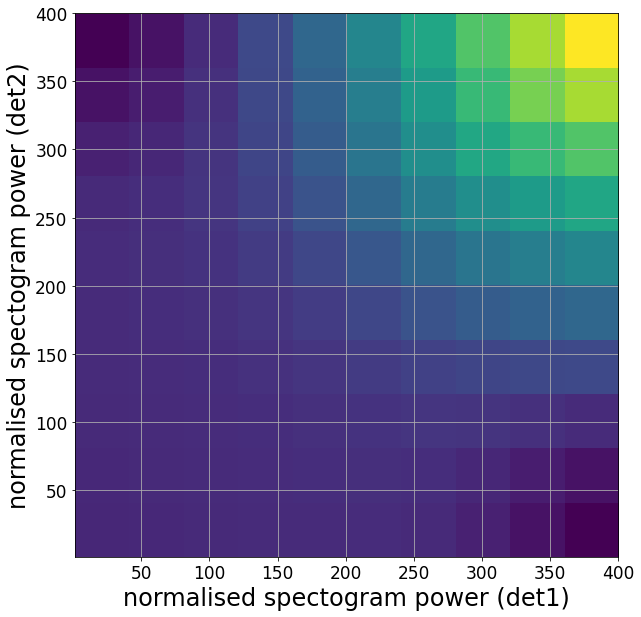

In [12]:
fig, ax = plt.subplots(figsize=(14,10))
ax.imshow(np.log(v2d.signoiseline),origin="lower",extent=[powers.min(),powers.max(),powers.min(),powers.max()])
ax.set_xlabel("normalised spectogram power (det1)")
ax.set_ylabel("normalised spectogram power (det2)")

This can be saved as a lookup table file using the script

In [15]:
v2d.save_lookup("./")